In [52]:
import pandas as pd

In [53]:
df = pd.read_csv(r"C:\Users\trist\Downloads\Viewing Activity.csv")

In [54]:
df.shape

(8011, 10)

In [55]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Tristan,3/7/2023 18:59,0:10:34,NaN,The Walking Dead: Season 4: 30 Days Without an...,NaN,Apple iPhone 8 Plus (CDMA),0:42:30,0:42:30,US (United States)
1,Tristan,3/7/2023 17:11,0:14:16,NaN,The Walking Dead: Season 4: 30 Days Without an...,NaN,Apple iPhone 8 Plus (CDMA),0:31:55,Not latest view,US (United States)
2,Tristan,3/6/2023 19:19,0:00:23,Autoplayed: user action: None;,The Walking Dead: Season 1_hook_primary_16x9,HOOK,Apple iPhone 8 Plus (CDMA),0:00:23,0:00:23,US (United States)
3,Tristan,3/6/2023 19:19,0:17:07,NaN,The Walking Dead: Season 4: 30 Days Without an...,NaN,Apple iPhone 8 Plus (CDMA),0:17:39,Not latest view,US (United States)
4,Tristan,3/6/2023 17:26,0:00:05,NaN,The Walking Dead: Season 4: 30 Days Without an...,NaN,Apple iPhone 8 Plus (CDMA),0:00:12,Not latest view,US (United States)


In [56]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)

In [57]:
df.head(1)

,Start Time,Duration,Title
0,3/7/2023 18:59,0:10:34,The Walking Dead: Season 4: 30 Days Without an...


In [58]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [59]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [60]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

In [61]:
# reset the index so that Start Time becomes a column again
df = df.reset_index()

In [62]:
#double-check that it worked
df.head(1)

,Start Time,Duration,Title
0,2023-03-07 18:59:00+00:00,0:10:34,The Walking Dead: Season 4: 30 Days Without an...


In [63]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, UTC]
Duration          timedelta64[ns]
Title                      object
dtype: object

In [64]:
# create a new dataframe called walkingdead that takes from df
# only the rows in which the Title column contains 'The Walking Dead'
walkingdead = df[df['Title'].str.contains('The Walking Dead', regex=False)]

In [65]:
walkingdead.shape

(113, 3)

In [66]:
walkingdead = walkingdead[(walkingdead['Duration'] > '0 days 00:01:00')]

In [67]:
walkingdead.shape

(85, 3)

In [68]:
walkingdead['Duration'].sum()

Timedelta('1 days 06:50:39')

In [69]:
walkingdead['weekday'] = walkingdead['Start Time'].dt.weekday
walkingdead['hour'] = walkingdead['Start Time'].dt.hour

In [70]:
walkingdead.head(1)

,Start Time,Duration,Title,weekday,hour
0,2023-03-07 18:59:00+00:00,0 days 00:10:34,The Walking Dead: Season 4: 30 Days Without an...,1,18


In [71]:
%matplotlib inline
import matplotlib

In [72]:
# set categorical and define the order so the days are plotted Monday-Sunday
walkingdead['weekday'] = pd.Categorical(walkingdead['weekday'], categories=[0,1,2,3,4,5,6], ordered=True)

In [73]:
#create walkingdead_by_day and count the rows for each weekday, assigning the result to that variable
walkingdead_by_day = walkingdead['weekday'].value_counts()

In [74]:
#sort the index using our categoriacal, so that Monday (0) is first, Tuesday (1) is second, etc.
walkingdead_by_day = walkingdead_by_day.sort_index()

<AxesSubplot:title={'center':'Walking Dead Episodes Watched by Day'}>

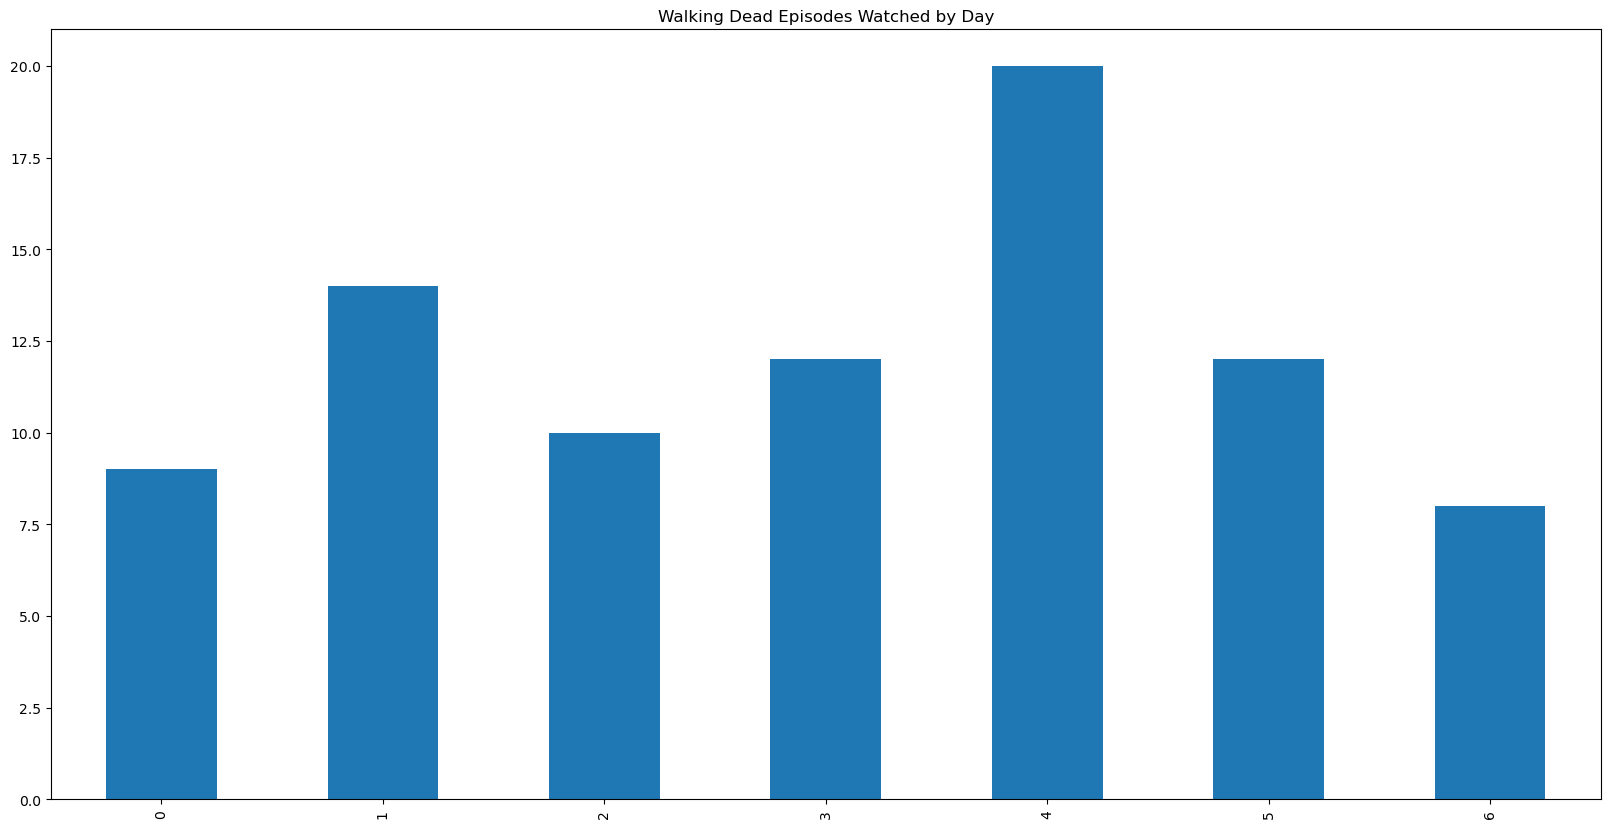

In [75]:
#plot walkingdead_by_day as a bar chart with the listed size and title
walkingdead_by_day.plot(kind= 'bar', figsize=(20,10), title= 'Walking Dead Episodes Watched by Day')

In [76]:
# set our categorical and define the order so the hours are plotted 0-23
walkingdead['hour'] = pd.Categorical(walkingdead['hour'], categories= 
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

In [77]:
# create walkingdead_by_hour and count the rows for each hour, assigning the result to that variable
walkingdead_by_hour = walkingdead['hour'].value_counts()

In [78]:
# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
walkingdead_by_hour = walkingdead_by_hour.sort_index()

<AxesSubplot:title={'center':'Walking Dead Episodes Watched by Hour'}>

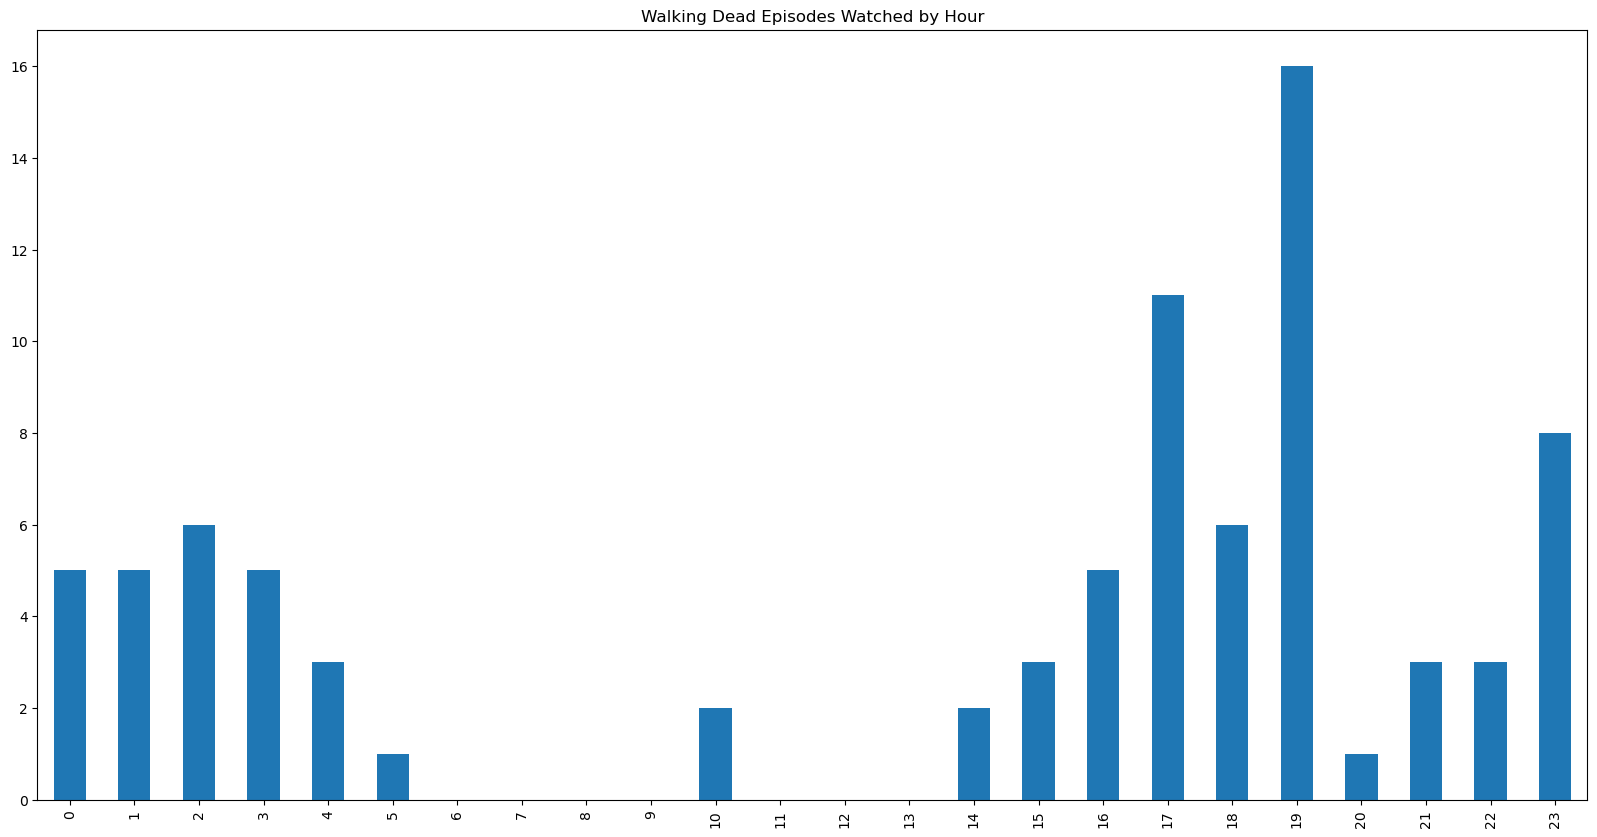

In [79]:
# plot walkingdead_by_hour as a bar chart with the listed size and title
walkingdead_by_hour.plot(kind= 'bar', figsize=(20,10), title='Walking Dead Episodes Watched by Hour')